### Support Vector Machines


In this unit, we will learn about support vector machines (SVMs). We will start by discussing the intuition behind this model and learn about the kernel trick. We will then test it on the circles dataset from the previous unit using Scikit-learn estimators.

In the last units, we plotted the decision boundary of different estimators. Intuitively, we want these boundaries to be far from the data points of the different classes in our problem. For instance, here is a sample dataset with three possible decision boundaries.



The blue and the red ones both classify the data points from the two classes without making any mistakes. However, we expect the estimator that corresponds to the red boundary to give better results than the blue one because the red line is farther away from the data points from both classes. Hence, it should generalize better.

This is the idea behind support vector machines. SVMs try to find the separation with the maximum margin around it. To achieve this, the model minimizes the hinge loss.

hinge(s) = max(0,1-ys)

In this formula, s is the output of the SVM classifier and y the class label. The output s determines on which side of the decision boundary a data point is. The model predicts the positive class if the output is positive, and the negative class if the output is negative. The class labels y are either -1 for the negative class or +1 for the positive class (instead of the usual 0/1 values). 

It is important to understand that the hinge loss can penalize points even if they are on the correct side of the decision boundary. For instance, for the positive class (blue line), output values between 0 and 1 have a nonzero loss value even if they are correctly classified (the output is positive). Similarly, for the negative class (red line), the hinge loss penalizes points with an output value between -1 and 0. This “penalization” area around the decision boundary is called the margin of the SVM classifier.

Here is an image of a possible decision boundary and its margin. Minus and plus signs denote points from the negative and the positive classes. We mark data points that are either inside the margin or on the wrong side of the decision boundary (misclassified) in red.

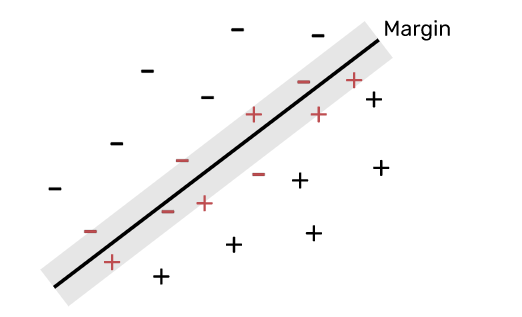

In [1]:
from IPython.display import Image
Image(filename="margin.png")

These data points in red are the only ones with a nonzero loss value. In that sense, the decision boundary only depends on this (typically small) subset of data points called support vectors.

To summarize, support vector machines try to find a decision boundary with the largest margin while minimizing the number of data points inside its margin or on the wrong side of the decision boundary. In practice, we can control this trade-off with a C parameter. 

* Small values produce classifiers that try to maximize the margin (can lead to underfitting) whereas 
* Larger values produce classifiers that try to avoid misclassifying data points (can lead to overfitting). 

In that sense, this C parameter controls the complexity of the model and is similar to the C parameter in logistic regressions.

#### Non-linear Classification

We saw above that SVMs try to find the output values s that minimize the hinge loss. These output values correspond to the usual linear model in which we multiply feature values with coefficients from a vector w (just like linear regressions).

This model can be too rigid in some cases when there are nonlinear relationships between the variables. But we can solve this issue by introducing new features. For instance, here is a modified version of the circles dataset from the previous unit. This time, the two classes don’t overlap. This dataset is not linearly separable in the sense that we cannot draw a line that separates the two classes.



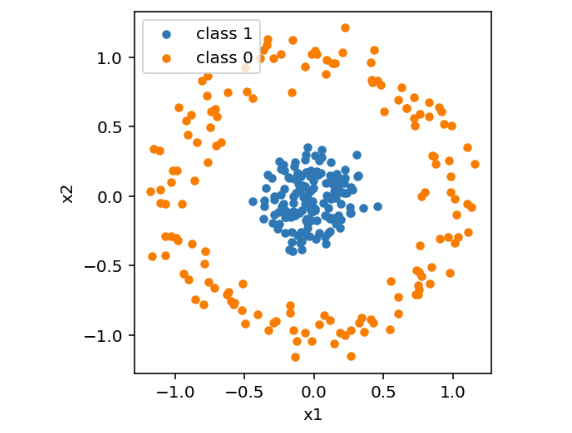

In [2]:
from IPython.display import Image
Image(filename="nonlinear.png")

But we can add new variables to make it linearly separable. For instance, one solution is to add 

x3 = x1^2 + x2^2 

Here is a plot of the data in this “extended” feature space with three variables.

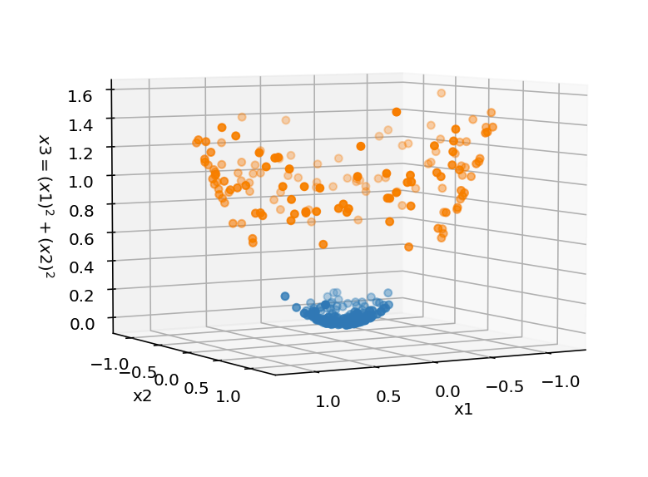

In [3]:
from IPython.display import Image
Image(filename="aux.png")

As we can see, it’s now possible to draw a hyperplane to separate the data points from the two classes (e.g., 

x3 = 0.3
                                                                                                        
In this case, we were able to perform nonlinear classification by adding a new feature. However, with support vector machines, there is an easier way to achieve this called the **kernel trick**.

### Dual problem and kernel trick

reformulate our problem of finding a vector of coefficients w into its dual problem in which we want to find a vector α where each entry corresponds to a data point in our training set. You can think of this vector as a way to indicate how important each point is to determine on which side of the decision boundary we are.

k(xi,xj)=xi^txj

This function k is called the linear kernel and is equivalent to the kernel matrix K from above. The idea behind the kernel trick is to compute this product in another feature space where our data becomes linearly separable.

In this notation, the letter ϕ(pronounced as phi) denotes the new feature space and corresponds to the value of the vector xi in this new feature space. In the circles example from above, the new feature space corresponds to the 3-dimensional space with the additional feature.

k(xi,xj) = e^(-γ||xi-xj||^2)

As you can see, the kernel function k is not defined as a product between the two data points. Instead, the value of the kernel is a function of the Euclidean distance between the two points.

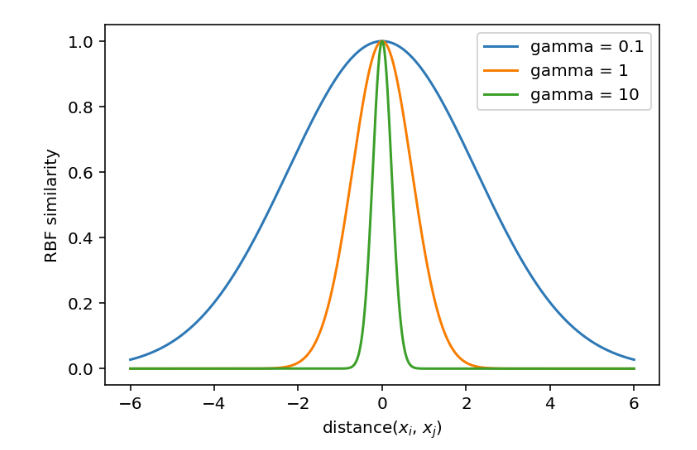

In [4]:
from IPython.display import Image
Image(filename="gamma.png")

Points that are close to each other have a kernel value close to one and points that are far from each other have a value close to zero. The γ (gamma) parameter controls how much the points can affect each other. Large gamma values produce small kernel values, except if the two points are close to each other, and we can increase the effect of points further away by decreasing gamma.

Support vector machines are very popular due to this kernel trick. Note that this technique is not specific to SVMs. For instance, it’s possible to reformulate ridge regression to obtain kernel ridge regression (KRR). In practice, working with kernels can be computationally expensive because we need to evaluate the kernel function for any pair of data points. However, support vector machines work well with kernels because the decision boundary only depends on a subset of the data points with a nonzero entry in the α parameter (the support vectors).

#### Scikit-learn implementation
We now know the intuition behind support vector machines and kernels. Let’s see how to use them with Scikit-learn. We will use the circles dataset from the previous unit.



In [5]:
from sklearn.datasets import make_circles

# Generate circle dataset
X, y = make_circles(n_samples=200, shuffle=True, noise=0.3, random_state=0, factor=0.3)

Let’s start with linear SVM. Scikit-learn provides a LinearSVC estimator which is a very efficient implementation of support vector machines with a linear kernel.



In [6]:
from sklearn.svm import LinearSVC

# Create SVM with linear kernel
linear_svc = LinearSVC()

# Fit estimator
linear_svc.fit(X, y)

LinearSVC()

In this code, we create the estimator and fit it to the data. Let’s use the decision_surface() function from the previous unit to visualize its decision boundary.

You should get the following result:

In [8]:
import numpy as np

# Helper function
def decision_surface(ax, x1, x2, y, estimator):
    # Same scale for x- and y-axis
    ax.set_aspect("equal", adjustable="box")

    # Plot data points
    class1_idx = y == 1
    plt.scatter(x1[class1_idx], x2[class1_idx], color="C3", label="class 1")
    plt.scatter(x1[~class1_idx], x2[~class1_idx], color="C0", label="class 0")

    # Create a grid of values
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    x_values = np.linspace(*xlim, num=500)
    y_values = np.linspace(*ylim, num=500)
    xx, yy = np.meshgrid(x_values, y_values)
    grid_points = np.c_[xx.flatten(), yy.flatten()]

    # Compute predictions
    preds = estimator.predict(grid_points)
    zz = preds.reshape(xx.shape)

    # Draw decision boundary
    plt.contour(xx, yy, zz, levels=[0.5], colors="gray")

    # Plot decision surface with level curves
    plt.contourf(xx, yy, zz, alpha=0.1, cmap=plt.cm.coolwarm)
    plt.legend()
    plt.show()

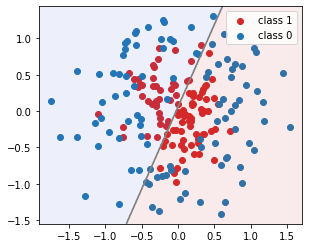

In [9]:
# Plot decision surface
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, linear_svc)

As we saw above, the linear kernel can only perform linear classification. Hence, the only way to classify these data points correctly using this linear_svc classifier is to add new features to the dataset. However, we know from above that we can also perform nonlinear classification using other kernels. Scikit-learn provides an SVC estimator that implements many different ones.

In [10]:
from sklearn.svm import SVC

# Create SVM with RBF kernel
rbf_svc_c1 = SVC(kernel="rbf", C=1)

# Fit estimator
rbf_svc_c1.fit(X, y)

SVC(C=1)

In this code, we create an SVM classifier with an RBF kernel and set the C value to one. Let’s visualize its decision boundary.



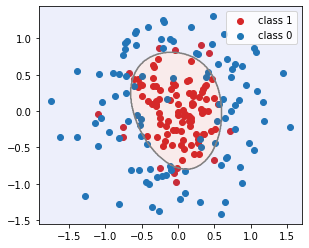

In [11]:
# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rbf_svc_c1)

This time, the boundary forms an ellipse around the data points from the positive class. In our case, we know that the data was generated using a circle. Hence, this elliptical decision boundary might be a sign of overfitting. We saw above that we can reduce overfitting by decreasing the value of C. Let’s try with a value of 0.1.

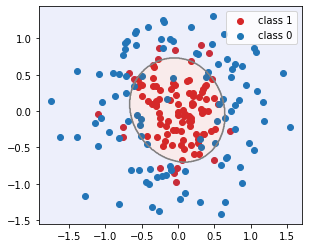

In [12]:
# Create SVM estimator with RBF kernel and C=0.1
rbf_svc_c01 = SVC(kernel="rbf", C=0.1)

# Fit estimator
rbf_svc_c01.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rbf_svc_c01)

This time, we get a nice circle that should generalize better to new data points.

Gamma γ is another important parameter of the RBF kernel which controls how much influence each data point has. You can think of this gamma parameter as a way to control how smooth the decision boundary is. Let’s try to increase the default value of one to a hundred.

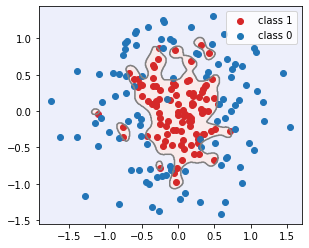

In [13]:
# Create RBF SVM with C=1 and gamma=100
rbf_svc_g100 = SVC(kernel="rbf", C=1, gamma=100)

# Fit estimator
rbf_svc_g100.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rbf_svc_g100)

As we can see, the decision surface becomes very complex and starts overfitting. If we keep increasing gamma, data points need to be really to close to each other to be affected and the classifier cannot generalize anymore.

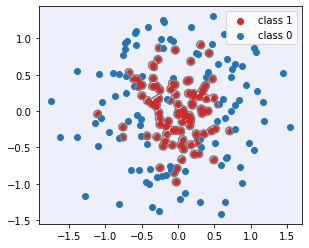

In [14]:
# Create RBF SVM with C=1 and large gamma value
rbf_svc_g1000 = SVC(kernel="rbf", C=1, gamma=1000)

# Fit estimator
rbf_svc_g1000.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rbf_svc_g1000)

On the other hand, we can reduce the complexity of the model by decreasing gamma. Let’s try to set it to 0.1.



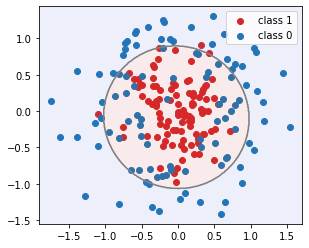

In [15]:
# Create RBF SVM with C=1 and gamma=0.1
rbf_svc_g01 = SVC(kernel="rbf", C=1, gamma=0.1)

# Fit estimator
rbf_svc_g01.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rbf_svc_g01)

The decision boundary is very similar to the rbf_svc_c01 estimator one from above.

Finally, let’s try with a small gamma value.

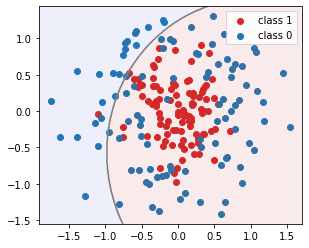

In [17]:
# Create RBF SVM with C=1 and small gamma value
rbf_svc_g001 = SVC(kernel="rbf", C=1, gamma=0.01)

# Fit estimator
rbf_svc_g001.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rbf_svc_g001)

This time, the decision boundary is “too smooth” to model the data, and our estimator is underfitting. In practice, it’s critical to have good C and γ values, and we usually tune them using grid search.

### Liblinear versus libsvm
If you take a look at the documentation page of the SVC estimator, you can see that it’s also possible to use the linear kernel by setting the kernel parameter to linear. Hence, there are two ways to fit a support vector machine with a linear kernel.

* With the LinearSVC estimator
* By setting kernel='linear' in an SVC estimator

In fact, these two estimators compute the optimal vector α in two different ways. The LinearSVC estimator uses the “liblinear” solver (based on the coordinate descent algorithm) which should scale better to a large number of samples. On the other hand, the SVC estimator uses the “libsvm” solver (based on the SMO algorithm) which can work with nonlinear kernels but is slower than liblinear.

Hence, we usually create a LinearSVC estimator when the kernel is linear and use the SVC one when we want to test other kernels. However, note that SVC doesn’t scale well to a large number of data points which can be an important limitation in practice.

In [ ]:
]